# problem statement
Problem Statement:
Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.


# importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from scipy.stats import zscore

# loading the dataset

In [2]:
df=pd.read_csv("zomato.csv")

In [3]:
dfcode=pd.read_csv("Country-Code.csv")

In [4]:
dfcode.head(10)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [17]:
dfall = pd.merge(df, dfcode, how='inner', on ='Country Code')

In [18]:
dfall.sample(25)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
8627,18396157,Biryani House,1,Noida,"C block market, sector 41, Noida",Sector 41,"Sector 41, Noida",77.361707,28.569208,"Biryani, North Indian",...,No,Yes,No,No,1,3.1,Orange,Average,9,India
532,16613059,Poets Cafe,14,Montville,"167 Main St, Montville, QLD",Montville,"Montville, Montville",152.893735,-26.690462,"Coffee and Tea, Modern Australian",...,No,No,No,No,3,2.4,Red,Poor,193,Australia
8848,312186,221 B Baker Street,1,Noida,"PG 30, TOT Mall, Sector 62, Noida",Sector 62,"Sector 62, Noida",77.371606,28.614281,Bakery,...,No,Yes,No,No,1,3.2,Orange,Average,19,India
3782,18312607,Cafe Coffee Day,1,New Delhi,"HPCL Petrol Pump, Near IOC Office, Green Park,...",Green Park,"Green Park, New Delhi",77.206909,28.556972,Cafe,...,No,No,No,No,1,3.0,Orange,Average,4,India
5339,18379056,Creamy Creation,1,New Delhi,"B-66, East Vinod Nagar, Near Mayur Vihar Phase...",Mayur Vihar Phase 2,"Mayur Vihar Phase 2, New Delhi",77.309698,28.623975,Bakery,...,No,No,No,No,1,0.0,White,Not rated,0,India
6329,18445759,Gopal Ji Rasoi Wala,1,New Delhi,"A-75, Opposite Lancer Convent School, Prashant...",Prashant Vihar,"Prashant Vihar, New Delhi",77.133783,28.710155,North Indian,...,No,No,No,No,1,0.0,White,Not rated,2,India
8789,18477658,52 Food Express,1,Noida,"B Block Market, Sector 52, Noida",Sector 52,"Sector 52, Noida",77.368107,28.586413,"North Indian, Chinese",...,No,No,No,No,1,0.0,White,Not rated,2,India
5219,311377,Meenakshi Bhawan,1,New Delhi,"BE-334, Main Road, Hari Nagar, Mayapuri Phase ...",Mayapuri Phase 2,"Mayapuri Phase 2, New Delhi",77.119336,28.630784,"South Indian, Chinese",...,No,No,No,No,1,3.1,Orange,Average,14,India
9380,6114829,Duck & Waffle,215,London,"Heron Tower, 110 Bishopsgate, City of London, ...","Bishopsgate, City Of London","Bishopsgate, City Of London, London",-0.080963,51.516284,British,...,No,No,No,No,3,4.9,Dark Green,Excellent,706,United Kingdom
8446,7784,Mainland China,1,Noida,"Ground Floor, Plot K-1, Dharam Palace, Sector ...",Sector 18,"Sector 18, Noida",77.322245,28.571817,Chinese,...,Yes,Yes,No,No,3,3.7,Yellow,Good,743,India


In [7]:
df.shape

(9551, 21)

one column country has been added to the database 

In [19]:
dfall.shape

(9551, 22)

In [20]:
dfall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [21]:
dfall.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [22]:
dfall.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

there are no null values

In [23]:
dfall.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

restaurant ID column can be dropped because it contains all unqiue values

In [25]:
dfall.drop(['Restaurant ID'],axis=1,inplace=True)

In [26]:
dfall.dtypes

Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

we have to detremine price range and average cost for two

we can drop Switch to order menu because it has only one value

In [40]:
dfall.drop(['Switch to order menu'],axis=1,inplace=True)

# EDA

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '1'),
  Text(1, 0, '14'),
  Text(2, 0, '30'),
  Text(3, 0, '37'),
  Text(4, 0, '94'),
  Text(5, 0, '148'),
  Text(6, 0, '162'),
  Text(7, 0, '166'),
  Text(8, 0, '184'),
  Text(9, 0, '189'),
  Text(10, 0, '191'),
  Text(11, 0, '208'),
  Text(12, 0, '214'),
  Text(13, 0, '215'),
  Text(14, 0, '216')])

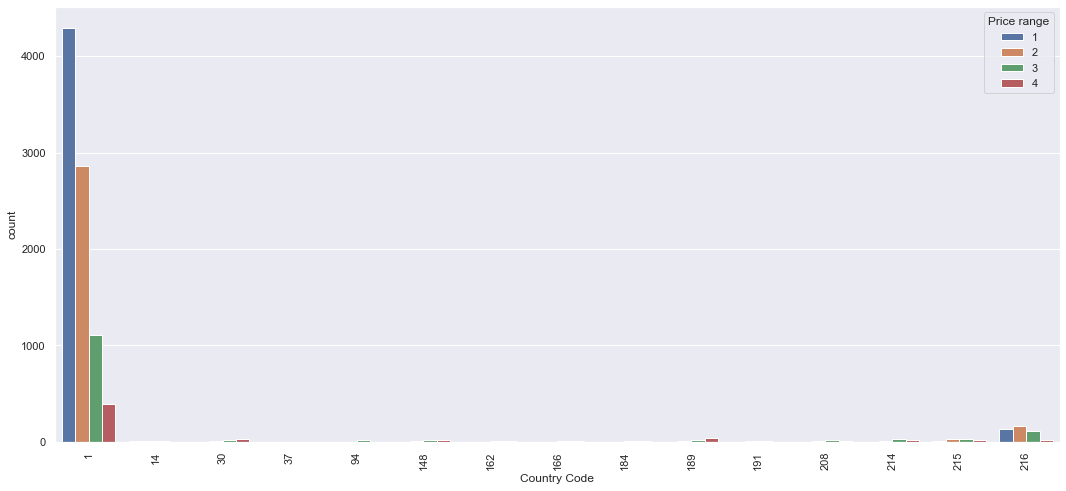

In [32]:
sns.set(rc={"figure.figsize":(18,8)})
sns.countplot(dfall['Country Code'],hue=dfall['Price range'])
plt.xticks(rotation=90)

price range is max for country code 1

<AxesSubplot:xlabel='Country Code', ylabel='count'>

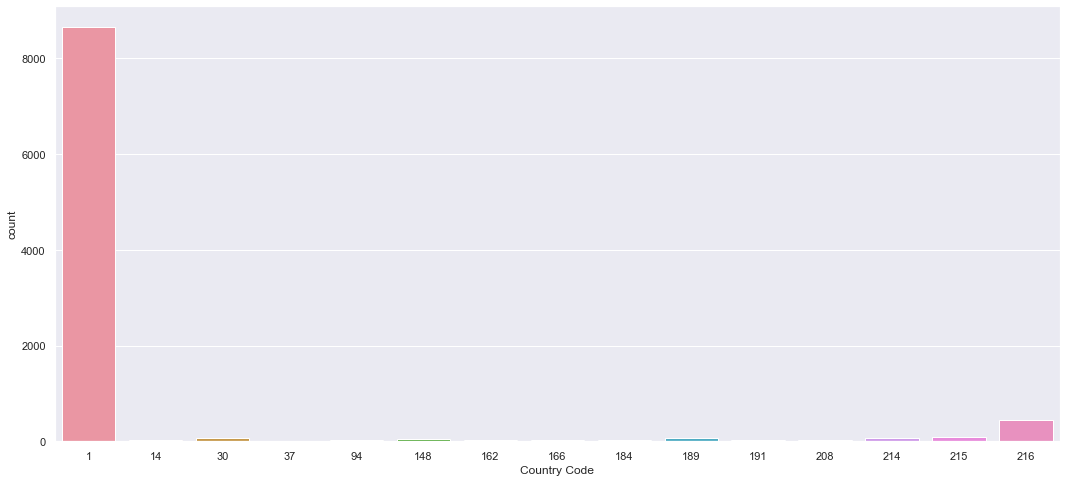

In [33]:
sns.countplot(dfall['Country Code'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Botswana Pula(P)'),
  Text(1, 0, 'Brazilian Real(R$)'),
  Text(2, 0, 'Dollar($)'),
  Text(3, 0, 'Emirati Diram(AED)'),
  Text(4, 0, 'Indian Rupees(Rs.)'),
  Text(5, 0, 'Indonesian Rupiah(IDR)'),
  Text(6, 0, 'NewZealand($)'),
  Text(7, 0, 'Pounds(��)'),
  Text(8, 0, 'Qatari Rial(QR)'),
  Text(9, 0, 'Rand(R)'),
  Text(10, 0, 'Sri Lankan Rupee(LKR)'),
  Text(11, 0, 'Turkish Lira(TL)')])

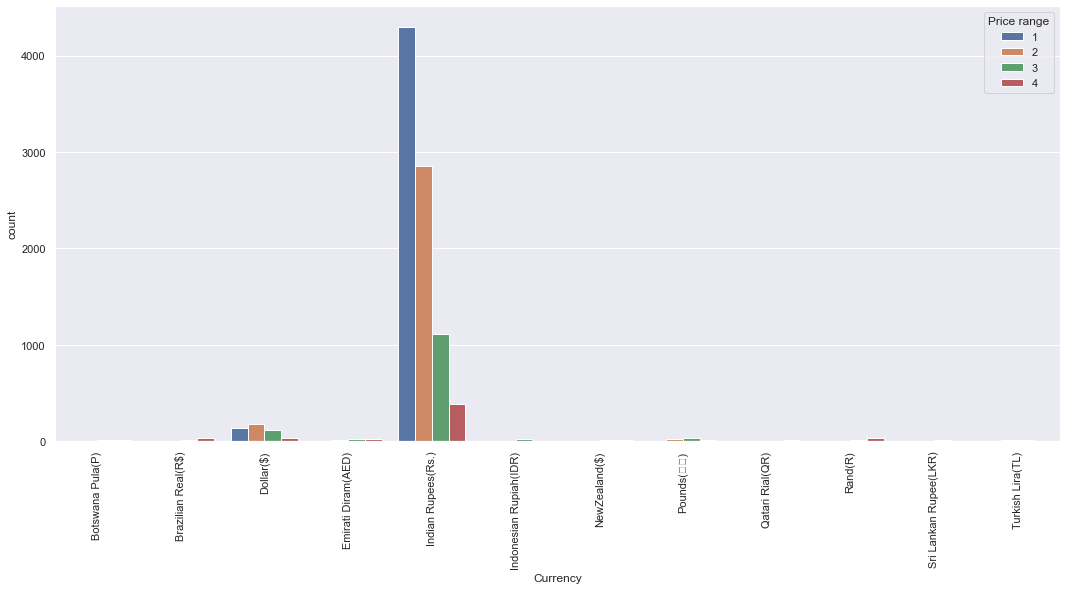

In [34]:
sns.set(rc={"figure.figsize":(18,8)})
sns.countplot(dfall['Currency'],hue=dfall['Price range'])
plt.xticks(rotation=90)

price range is max for restaurants accepting indian rupees

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

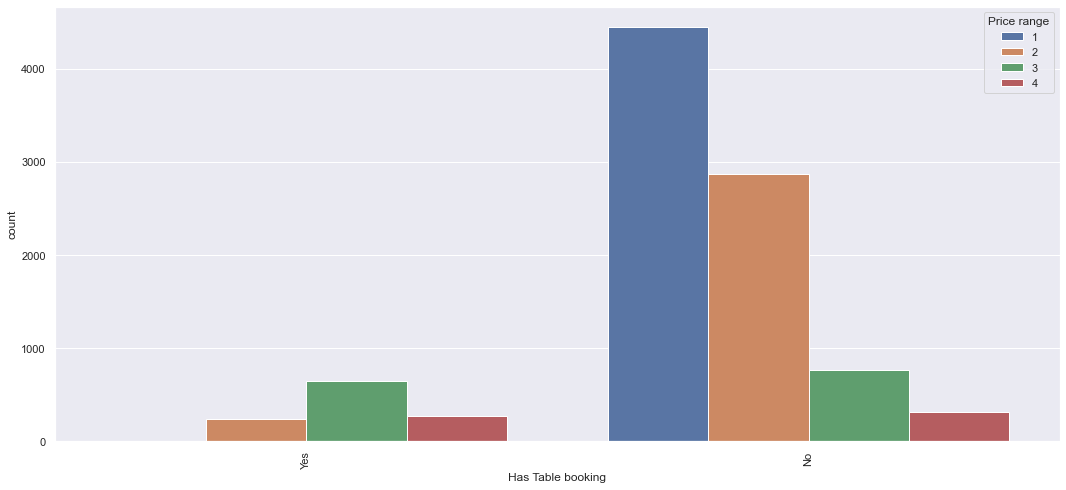

In [35]:
sns.set(rc={"figure.figsize":(18,8)})
sns.countplot(dfall['Has Table booking'],hue=dfall['Price range'])
plt.xticks(rotation=90)

price range is more for restaurants with no table booking

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

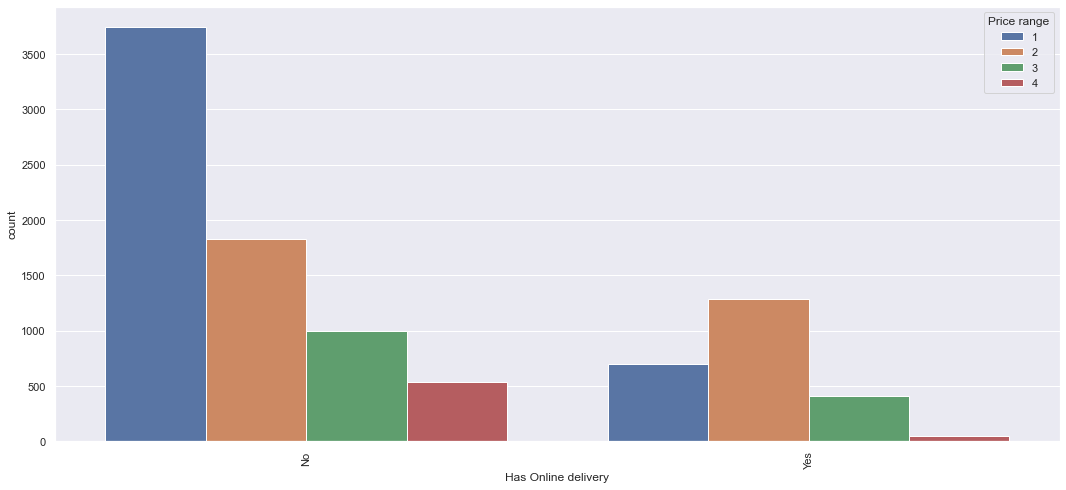

In [36]:
sns.set(rc={"figure.figsize":(18,8)})
sns.countplot(dfall['Has Online delivery'],hue=dfall['Price range'])
plt.xticks(rotation=90)

price range is more for restaurants with no online delivery

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

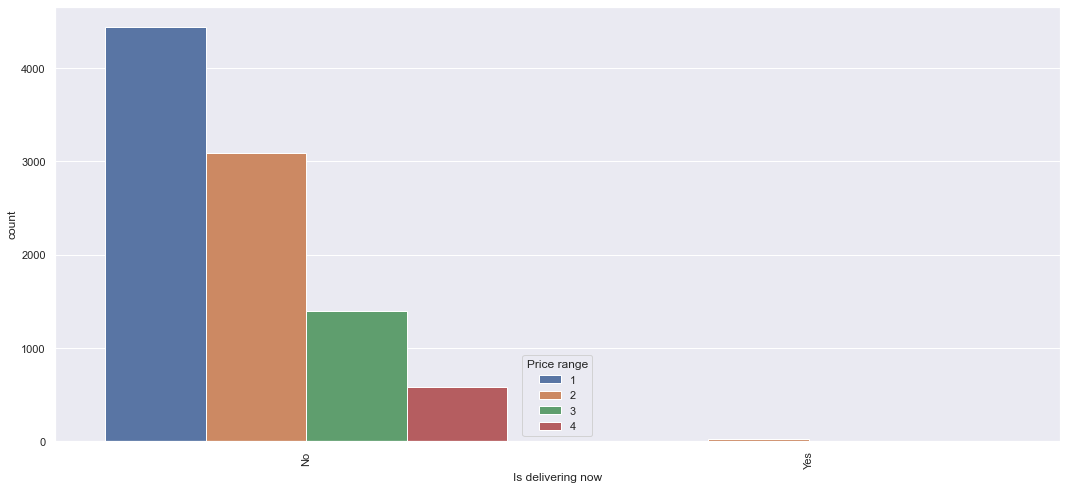

In [37]:
sns.set(rc={"figure.figsize":(18,8)})
sns.countplot(dfall['Is delivering now'],hue=dfall['Price range'])
plt.xticks(rotation=90)

price range is more for restaurants with no delivery now

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Dark Green'),
  Text(1, 0, 'Green'),
  Text(2, 0, 'Yellow'),
  Text(3, 0, 'Orange'),
  Text(4, 0, 'White'),
  Text(5, 0, 'Red')])

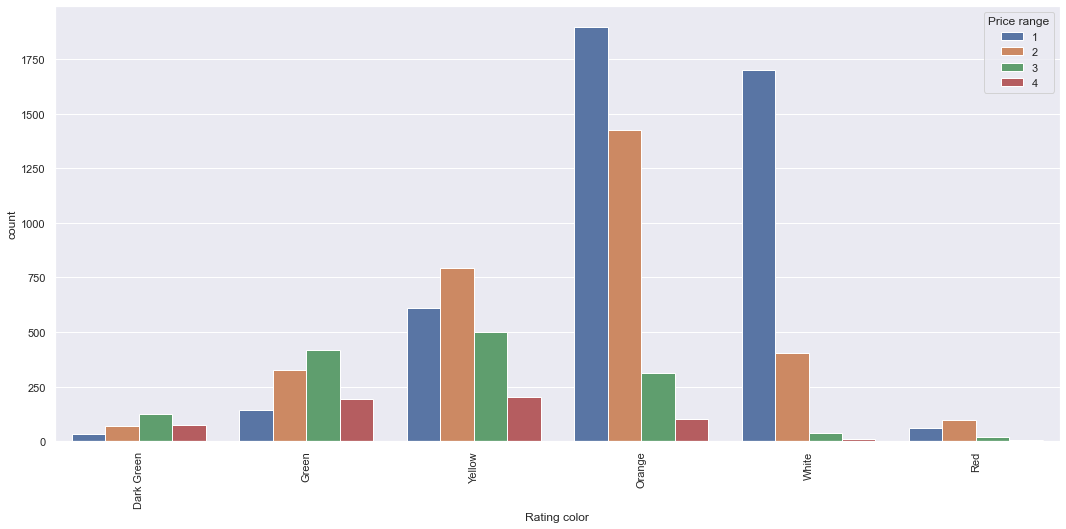

In [38]:
sns.set(rc={"figure.figsize":(18,8)})
sns.countplot(dfall['Rating color'],hue=dfall['Price range'])
plt.xticks(rotation=90)

price range is more for restaurants having rating color orange

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Excellent'),
  Text(1, 0, 'Very Good'),
  Text(2, 0, 'Good'),
  Text(3, 0, 'Average'),
  Text(4, 0, 'Not rated'),
  Text(5, 0, 'Poor')])

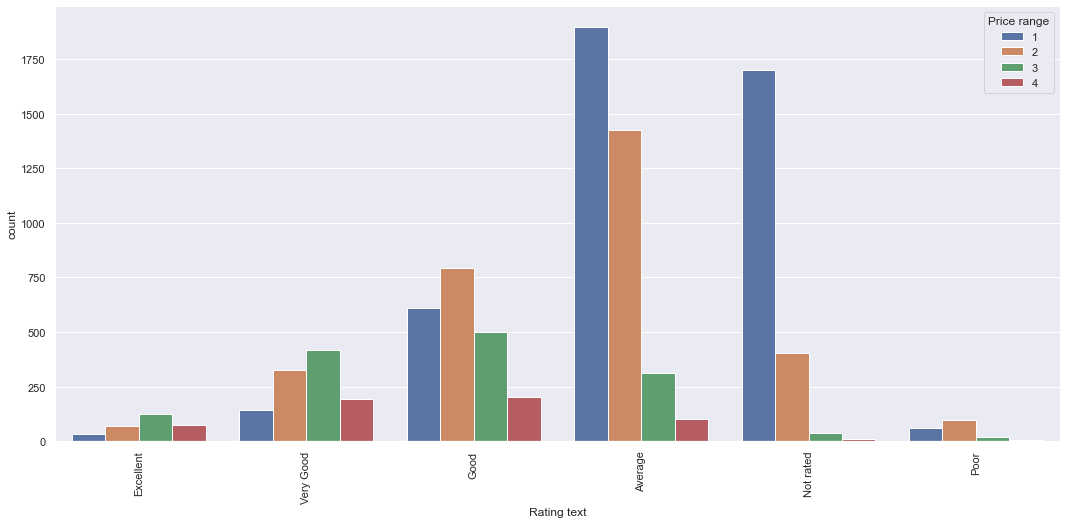

In [39]:
sns.set(rc={"figure.figsize":(18,8)})
sns.countplot(dfall['Rating text'],hue=dfall['Price range'])
plt.xticks(rotation=90)

price range is more for restaurants having rating text average

# label encoding

In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [47]:
lobject=['Restaurant Name','City','Address','Locality','Locality Verbose','Cuisines','Currency','Has Table booking','Has Online delivery','Is delivering now','Rating color','Rating text','Country']
for i in lobject:
    dfall[i]=le.fit_transform(dfall[i])

In [48]:
dfall.dtypes

Restaurant Name           int64
Country Code              int64
City                      int64
Address                   int64
Locality                  int64
Locality Verbose          int64
Longitude               float64
Latitude                float64
Cuisines                  int64
Average Cost for two      int64
Currency                  int64
Has Table booking         int32
Has Online delivery       int32
Is delivering now         int32
Price range               int64
Aggregate rating        float64
Rating color              int32
Rating text               int32
Votes                     int64
Country                   int32
dtype: object

In [50]:
dfall.shape

(9551, 20)

# distribution

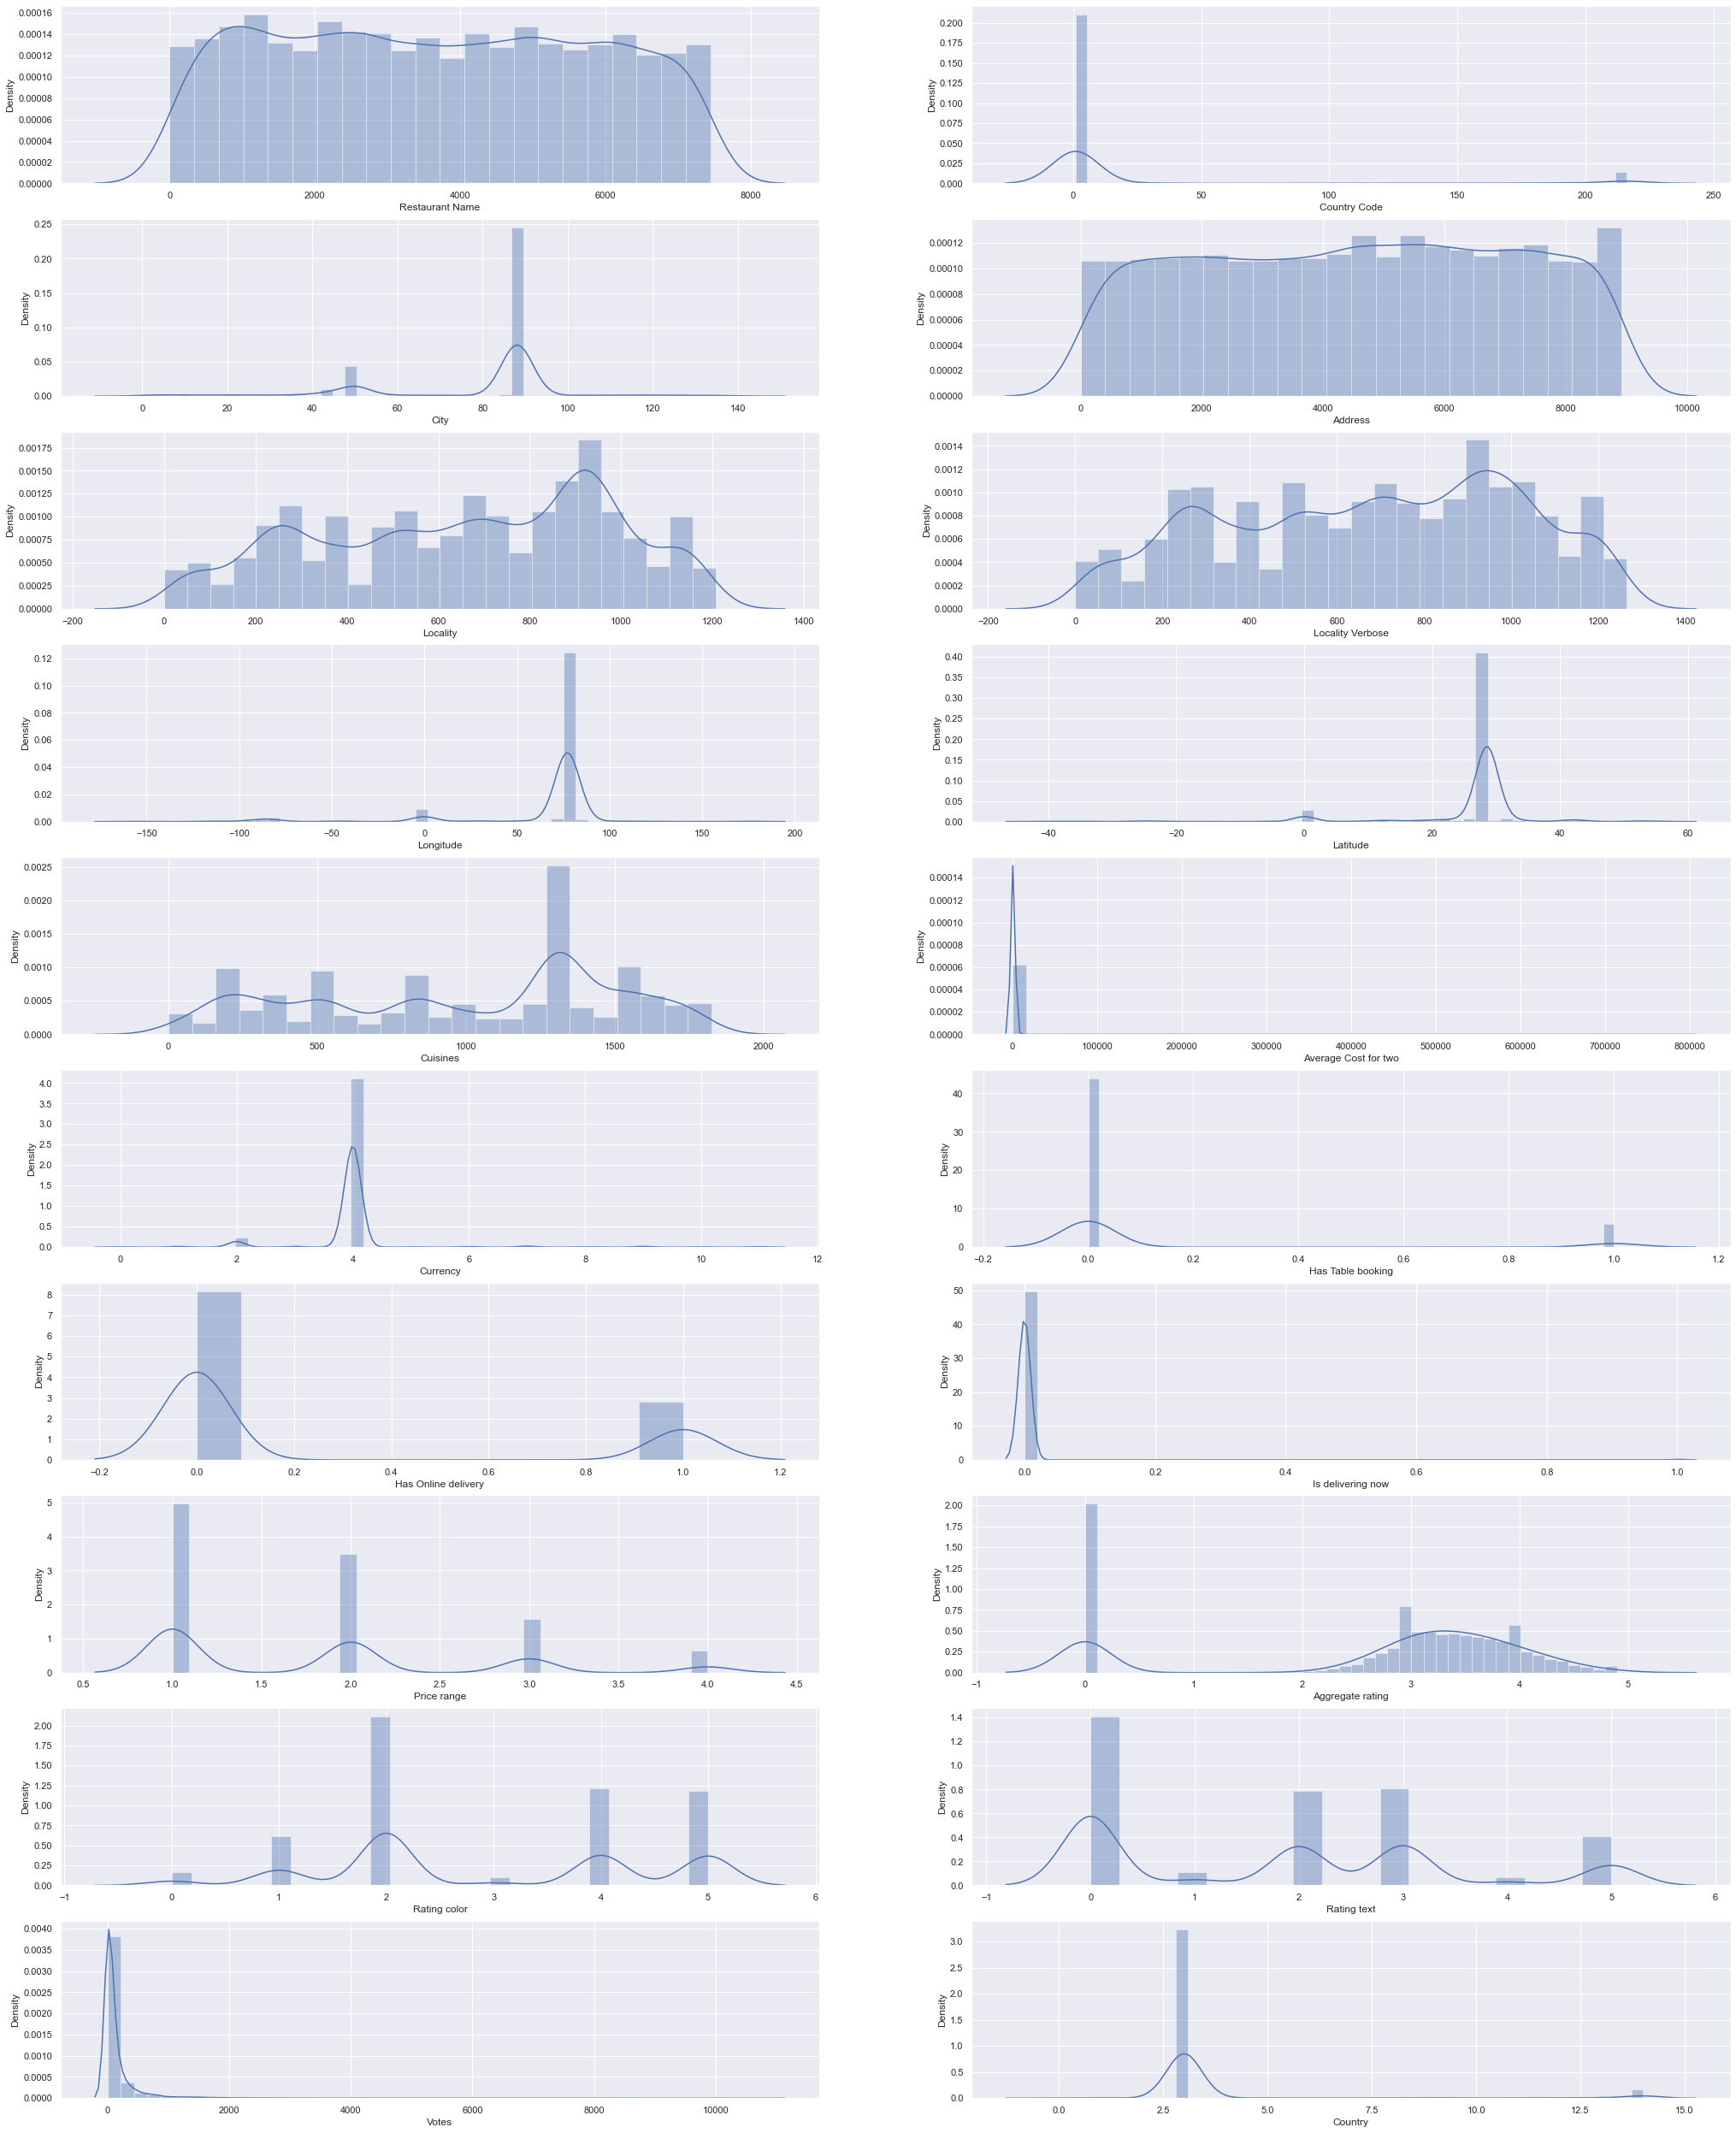

In [52]:
plt.figure(figsize=(35,45))
count =1
for column in dfall:
    if count <= 20:
        ax = plt.subplot(10,2,count)
        sns.distplot(dfall[column])
        plt.xlabel(column) 
    count+=1
plt.show()

skewness is present in multiple columns

# descriptive statistics

In [53]:
dfall.describe()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.00000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,3653.204586,18.365616,78.301434,4542.439430,658.128678,677.305204,64.126574,25.854381,989.95079,1199.210763,3.977699,0.121244,0.256622,0.003560,1.804837,2.666370,2.952885,1.788713,156.909748,3.736781
std,2142.917876,56.750546,23.198915,2565.717005,315.866877,331.727817,41.467058,11.007935,514.72354,16121.183073,0.914242,0.326428,0.436792,0.059561,0.905609,1.516378,1.493048,1.694637,430.169145,2.651963
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-157.948486,-41.330428,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1777.500000,1.000000,76.000000,2323.500000,381.000000,387.000000,77.081343,28.478713,497.00000,250.000000,4.000000,0.000000,0.000000,0.000000,1.000000,2.500000,2.000000,0.000000,5.000000,3.000000
50%,3595.000000,1.000000,88.000000,4610.000000,696.000000,707.000000,77.191964,28.570469,1127.00000,400.000000,4.000000,0.000000,0.000000,0.000000,2.000000,3.200000,2.000000,2.000000,31.000000,3.000000
75%,5485.500000,1.000000,88.000000,6746.500000,921.000000,953.000000,77.282006,28.642758,1355.00000,700.000000,4.000000,0.000000,1.000000,0.000000,2.000000,3.700000,4.000000,3.000000,131.000000,3.000000
max,7445.000000,216.000000,140.000000,8917.000000,1207.000000,1264.000000,174.832089,55.976980,1825.00000,800000.000000,11.000000,1.000000,1.000000,1.000000,4.000000,4.900000,5.000000,5.000000,10934.000000,14.000000


outliers are present

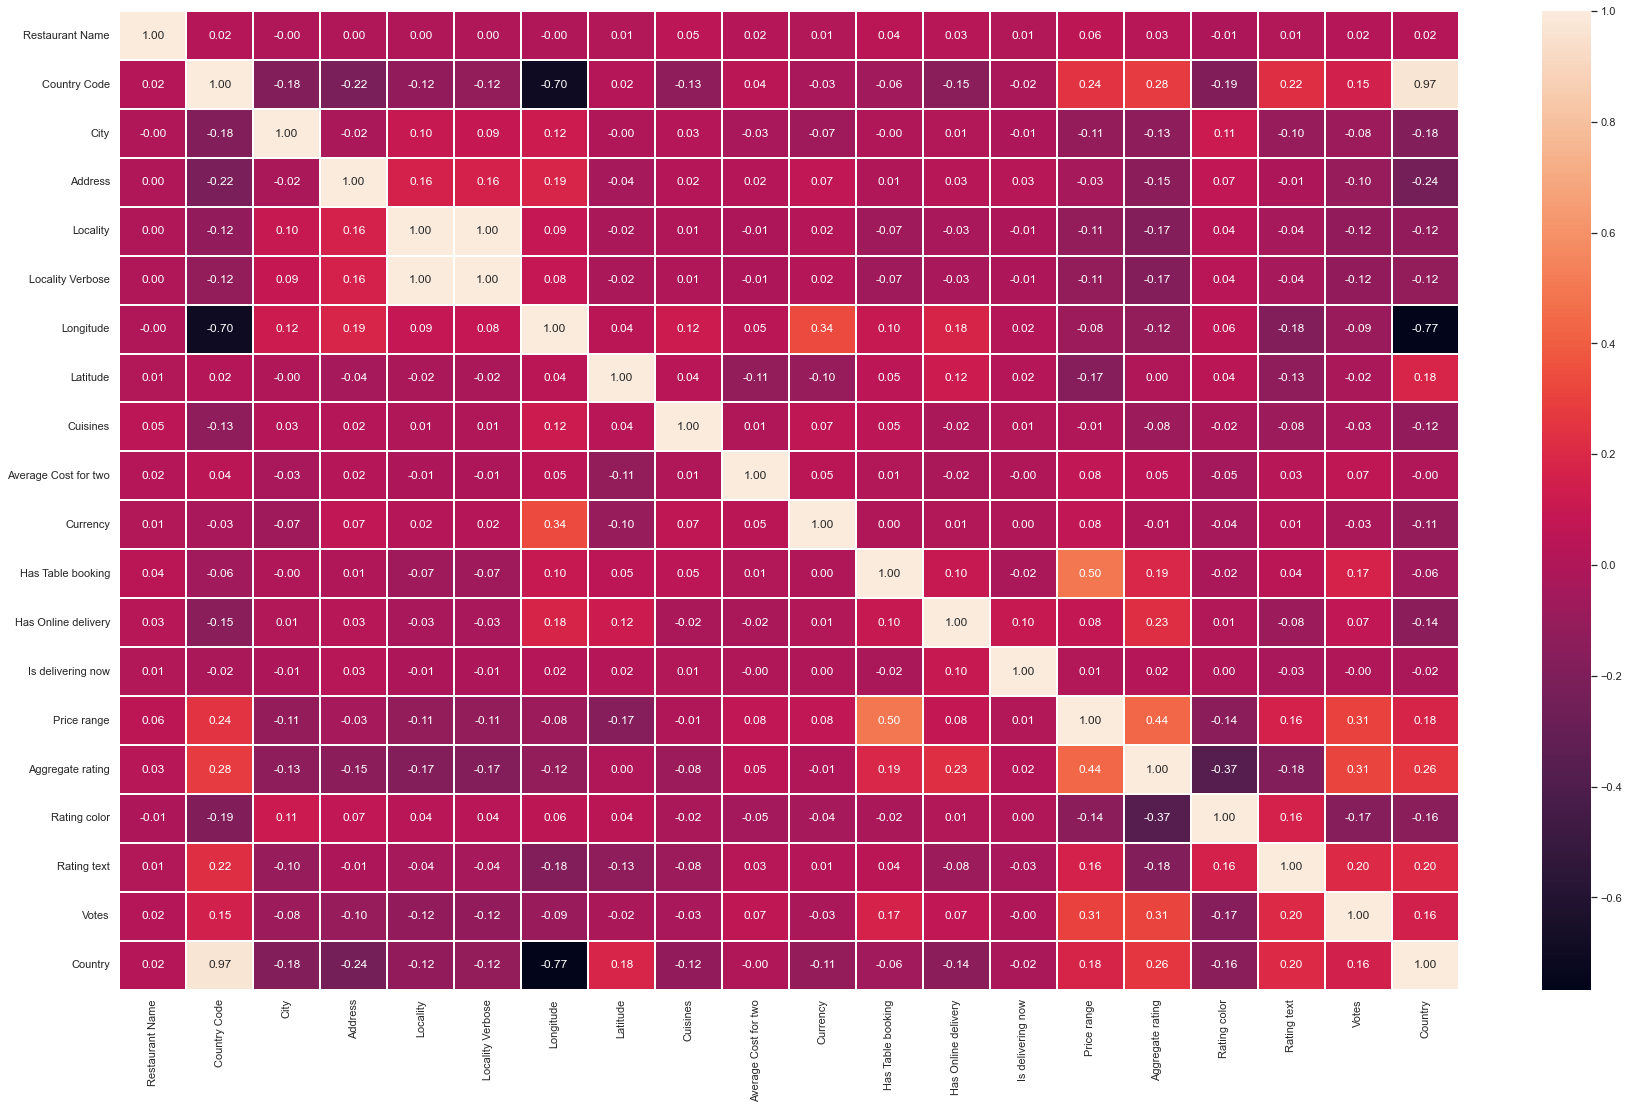

In [54]:
plt.figure(figsize=(30,18))
sns.heatmap(dfall.corr(),linewidth=0.2,annot=True,fmt="0.2f")
plt.show()

In [58]:
dfall.corr()["Price range"].sort_values()

Latitude               -0.166688
Rating color           -0.140468
Locality               -0.114457
Locality Verbose       -0.112311
City                   -0.105759
Longitude              -0.078939
Address                -0.034952
Cuisines               -0.005489
Is delivering now       0.010940
Restaurant Name         0.061275
Average Cost for two    0.075083
Currency                0.075179
Has Online delivery     0.077918
Rating text             0.164242
Country                 0.178035
Country Code            0.243327
Votes                   0.309444
Aggregate rating        0.437944
Has Table booking       0.501925
Price range             1.000000
Name: Price range, dtype: float64

we will drop locality verbose column because it produces multicollinearity

In [60]:
dfall.drop(["Locality Verbose"],axis=1,inplace=True)

# checking outliers

In [61]:
from scipy.stats import zscore
z=np.abs(zscore(dfall))

In [62]:
np.where(z>3)

(array([   0,    1,    2, ..., 9549, 9550, 9550], dtype=int64),
 array([9, 9, 9, ..., 9, 1, 9], dtype=int64))

In [63]:
dfnew=dfall[(z<3).all(axis=1)]

In [64]:
dfnew.shape

(8408, 19)

In [65]:
dfall.shape

(9551, 19)

% loss of data=(9551-8408)/9551*100=11%

In [68]:
dfall['Price range'].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

there is imbalance

# SMOTE

In [70]:
from imblearn.over_sampling import SMOTE

In [71]:
smt=SMOTE()

In [72]:
x=dfnew.drop(["Price range"],axis=1)
y=dfnew["Price range"]

In [73]:
trainx,trainy=smt.fit_resample(x,y)

In [74]:
trainx.shape

(17076, 18)

# skewness of data

In [76]:
trainx.skew().sort_values()

Currency               -10.358591
Longitude               -3.947305
Latitude                -3.058439
Aggregate rating        -1.466183
City                    -1.054169
Cuisines                -0.380897
Locality                -0.154937
Address                 -0.144680
Restaurant Name         -0.019090
Is delivering now        0.000000
Rating color             0.131229
Rating text              0.494613
Has Table booking        1.170026
Has Online delivery      1.611680
Average Cost for two     1.784928
Votes                    2.586571
Country Code            11.478369
Country                 11.924051
dtype: float64

In [77]:
list=['Currency','Country Code','Country']

In [78]:
for i in list:
    if trainx.skew().loc[i]>0.5:
        trainx[i]=np.log1p(trainx[i])

In [79]:
trainx.skew().sort_values()

Currency               -10.358591
Longitude               -3.947305
Latitude                -3.058439
Aggregate rating        -1.466183
City                    -1.054169
Cuisines                -0.380897
Locality                -0.154937
Address                 -0.144680
Restaurant Name         -0.019090
Is delivering now        0.000000
Rating color             0.131229
Rating text              0.494613
Has Table booking        1.170026
Has Online delivery      1.611680
Average Cost for two     1.784928
Votes                    2.586571
Country Code            10.188581
Country                 11.531380
dtype: float64

# standard scaler

In [80]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [81]:
dfx=sc.fit_transform(trainx)

In [82]:
dfx.mean()

-1.5682575672797817e-16

# application of machine learning models

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score

In [84]:
def model_selection(instance):
    maxacc=0
    rs=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(dfx,trainy,random_state=i,test_size=0.30)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)
        if((accuracy_score(y_test,pred_test))>maxacc):
            maxacc=accuracy_score(y_test,pred_test)
            rs=i
        print(f"at random state {i},  accuracy score is {accuracy_score(y_test,pred_test)}")
        print(f"at random state {i}, confusion matrix is {confusion_matrix(y_test,pred_test)}")
        print(f"at random state {i}, classification report is {classification_report(y_test,pred_test)}")
        print("\n")
    print("Max accuracy at random state",rs, "=",maxacc)
   

## Kneighbors classifier

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
model_selection(knn)

at random state 0,  accuracy score is 0.796213156353699
at random state 0, confusion matrix is [[1061  204   12    4]
 [ 361  755  127   12]
 [  21  153 1032   99]
 [   1    2   48 1231]]
at random state 0, classification report is               precision    recall  f1-score   support

           1       0.73      0.83      0.78      1281
           2       0.68      0.60      0.64      1255
           3       0.85      0.79      0.82      1305
           4       0.91      0.96      0.94      1282

    accuracy                           0.80      5123
   macro avg       0.79      0.80      0.79      5123
weighted avg       0.79      0.80      0.79      5123



at random state 1,  accuracy score is 0.7905524106968573
at random state 1, confusion matrix is [[1032  253   14    1]
 [ 356  755  126   10]
 [  27  139 1049   85]
 [   0    6   56 1214]]
at random state 1, classification report is               precision    recall  f1-score   support

           1       0.73      0.79      0.76

at random state 13,  accuracy score is 0.7907476088229553
at random state 13, confusion matrix is [[ 969  256   14    2]
 [ 349  784  125    9]
 [  23  153 1059   97]
 [   1    4   39 1239]]
at random state 13, classification report is               precision    recall  f1-score   support

           1       0.72      0.78      0.75      1241
           2       0.65      0.62      0.64      1267
           3       0.86      0.80      0.82      1332
           4       0.92      0.97      0.94      1283

    accuracy                           0.79      5123
   macro avg       0.79      0.79      0.79      5123
weighted avg       0.79      0.79      0.79      5123



at random state 14,  accuracy score is 0.7880148350575834
at random state 14, confusion matrix is [[1001  242   20    1]
 [ 376  818  154    9]
 [  25  113 1007   90]
 [   1    3   52 1211]]
at random state 14, classification report is               precision    recall  f1-score   support

           1       0.71      0.79   

at random state 26,  accuracy score is 0.7882100331836814
at random state 26, confusion matrix is [[ 992  251   14    2]
 [ 340  764  149   14]
 [  28  137 1012   82]
 [   0    7   61 1270]]
at random state 26, classification report is               precision    recall  f1-score   support

           1       0.73      0.79      0.76      1259
           2       0.66      0.60      0.63      1267
           3       0.82      0.80      0.81      1259
           4       0.93      0.95      0.94      1338

    accuracy                           0.79      5123
   macro avg       0.78      0.79      0.78      5123
weighted avg       0.79      0.79      0.79      5123



at random state 27,  accuracy score is 0.7915284013273473
at random state 27, confusion matrix is [[1023  241   19    2]
 [ 337  792  141   16]
 [  25  159 1036   90]
 [   0    3   35 1204]]
at random state 27, classification report is               precision    recall  f1-score   support

           1       0.74      0.80   

at random state 39,  accuracy score is 0.7880148350575834
at random state 39, confusion matrix is [[1027  240   15    3]
 [ 395  755  147    6]
 [  27  137 1041   77]
 [   1    3   35 1214]]
at random state 39, classification report is               precision    recall  f1-score   support

           1       0.71      0.80      0.75      1285
           2       0.67      0.58      0.62      1303
           3       0.84      0.81      0.83      1282
           4       0.93      0.97      0.95      1253

    accuracy                           0.79      5123
   macro avg       0.79      0.79      0.79      5123
weighted avg       0.79      0.79      0.79      5123



at random state 40,  accuracy score is 0.7921139957056412
at random state 40, confusion matrix is [[1059  226   18    2]
 [ 365  758  142   15]
 [  18  150 1033   69]
 [   1    4   55 1208]]
at random state 40, classification report is               precision    recall  f1-score   support

           1       0.73      0.81   

at random state 52,  accuracy score is 0.796213156353699
at random state 52, confusion matrix is [[1030  227   11    1]
 [ 337  756  143   11]
 [  21  146 1059   90]
 [   4    4   49 1234]]
at random state 52, classification report is               precision    recall  f1-score   support

           1       0.74      0.81      0.77      1269
           2       0.67      0.61      0.64      1247
           3       0.84      0.80      0.82      1316
           4       0.92      0.96      0.94      1291

    accuracy                           0.80      5123
   macro avg       0.79      0.79      0.79      5123
weighted avg       0.79      0.80      0.79      5123



at random state 53,  accuracy score is 0.7850868631661136
at random state 53, confusion matrix is [[1009  244   13    2]
 [ 350  786  161   15]
 [  18  140 1017   93]
 [   1    7   57 1210]]
at random state 53, classification report is               precision    recall  f1-score   support

           1       0.73      0.80    

at random state 65,  accuracy score is 0.7891860238141714
at random state 65, confusion matrix is [[1023  215   17    4]
 [ 359  802  147   21]
 [  30  143 1028   94]
 [   0    3   47 1190]]
at random state 65, classification report is               precision    recall  f1-score   support

           1       0.72      0.81      0.77      1259
           2       0.69      0.60      0.64      1329
           3       0.83      0.79      0.81      1295
           4       0.91      0.96      0.93      1240

    accuracy                           0.79      5123
   macro avg       0.79      0.79      0.79      5123
weighted avg       0.79      0.79      0.79      5123



at random state 66,  accuracy score is 0.7932851844622292
at random state 66, confusion matrix is [[1010  278   22    4]
 [ 314  814  153    7]
 [  15  136 1012   73]
 [   0    5   52 1228]]
at random state 66, classification report is               precision    recall  f1-score   support

           1       0.75      0.77   

at random state 78,  accuracy score is 0.7811829006441539
at random state 78, confusion matrix is [[ 999  274   14    3]
 [ 337  789  151    5]
 [  30  154  986   95]
 [   0    3   55 1228]]
at random state 78, classification report is               precision    recall  f1-score   support

           1       0.73      0.77      0.75      1290
           2       0.65      0.62      0.63      1282
           3       0.82      0.78      0.80      1265
           4       0.92      0.95      0.94      1286

    accuracy                           0.78      5123
   macro avg       0.78      0.78      0.78      5123
weighted avg       0.78      0.78      0.78      5123



at random state 79,  accuracy score is 0.7831348819051337
at random state 79, confusion matrix is [[1027  238   26    1]
 [ 343  785  139   11]
 [  27  173  989   85]
 [   0    4   64 1211]]
at random state 79, classification report is               precision    recall  f1-score   support

           1       0.74      0.79   

at random state 91,  accuracy score is 0.7866484481748975
at random state 91, confusion matrix is [[1009  275   15    1]
 [ 322  771  168   14]
 [  27  130 1014   87]
 [   1    3   50 1236]]
at random state 91, classification report is               precision    recall  f1-score   support

           1       0.74      0.78      0.76      1300
           2       0.65      0.60      0.63      1275
           3       0.81      0.81      0.81      1258
           4       0.92      0.96      0.94      1290

    accuracy                           0.79      5123
   macro avg       0.78      0.79      0.78      5123
weighted avg       0.78      0.79      0.78      5123



at random state 92,  accuracy score is 0.8008979113800507
at random state 92, confusion matrix is [[1053  234   16    2]
 [ 286  801  158   19]
 [  22  154 1016   59]
 [   1    6   63 1233]]
at random state 92, classification report is               precision    recall  f1-score   support

           1       0.77      0.81   

cv score

In [120]:
score=cross_val_score(knn,dfx,trainy,cv=9)
print(score)
print(score.mean())
print(score.std())

[0.70021075 0.70495258 0.76238145 0.72324723 0.77121771 0.76278334
 0.81866104 0.82973115 0.79652082]
0.7633006768122778
0.044264691748537276


## DecisionTreeClassifier

In [93]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model_selection(dtc)

at random state 0,  accuracy score is 0.981651376146789
at random state 0, confusion matrix is [[1276    5    0    0]
 [   2 1237   16    0]
 [   0   14 1259   32]
 [   0    0   25 1257]]
at random state 0, classification report is               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1281
           2       0.98      0.99      0.99      1255
           3       0.97      0.96      0.97      1305
           4       0.98      0.98      0.98      1282

    accuracy                           0.98      5123
   macro avg       0.98      0.98      0.98      5123
weighted avg       0.98      0.98      0.98      5123



at random state 1,  accuracy score is 0.9865313292992387
at random state 1, confusion matrix is [[1297    3    0    0]
 [   2 1230   15    0]
 [   0   12 1264   24]
 [   0    0   13 1263]]
at random state 1, classification report is               precision    recall  f1-score   support

           1       1.00      1.00      1.00

at random state 14,  accuracy score is 0.9841889517860628
at random state 14, confusion matrix is [[1261    3    0    0]
 [   3 1338   16    0]
 [   0    9 1190   36]
 [   0    1   13 1253]]
at random state 14, classification report is               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1264
           2       0.99      0.99      0.99      1357
           3       0.98      0.96      0.97      1235
           4       0.97      0.99      0.98      1267

    accuracy                           0.98      5123
   macro avg       0.98      0.98      0.98      5123
weighted avg       0.98      0.98      0.98      5123



at random state 15,  accuracy score is 0.982432168651181
at random state 15, confusion matrix is [[1274    8    0    0]
 [   4 1255   14    1]
 [   0   19 1257   30]
 [   0    0   14 1247]]
at random state 15, classification report is               precision    recall  f1-score   support

           1       1.00      0.99    

at random state 27, confusion matrix is [[1282    3    0    0]
 [   8 1260   18    0]
 [   0   20 1278   12]
 [   0    0   16 1226]]
at random state 27, classification report is               precision    recall  f1-score   support

           1       0.99      1.00      1.00      1285
           2       0.98      0.98      0.98      1286
           3       0.97      0.98      0.97      1310
           4       0.99      0.99      0.99      1242

    accuracy                           0.98      5123
   macro avg       0.99      0.99      0.99      5123
weighted avg       0.98      0.98      0.98      5123



at random state 28,  accuracy score is 0.980284989264103
at random state 28, confusion matrix is [[1273    9    0    0]
 [   9 1256   19    0]
 [   2   23 1270   22]
 [   0    0   17 1223]]
at random state 28, classification report is               precision    recall  f1-score   support

           1       0.99      0.99      0.99      1282
           2       0.98      0.98      0.

at random state 41, confusion matrix is [[1288    4    0    0]
 [   8 1232   18    0]
 [   0   17 1257   28]
 [   0    0   16 1255]]
at random state 41, classification report is               precision    recall  f1-score   support

           1       0.99      1.00      1.00      1292
           2       0.98      0.98      0.98      1258
           3       0.97      0.97      0.97      1302
           4       0.98      0.99      0.98      1271

    accuracy                           0.98      5123
   macro avg       0.98      0.98      0.98      5123
weighted avg       0.98      0.98      0.98      5123



at random state 42,  accuracy score is 0.9832129611555729
at random state 42, confusion matrix is [[1284    9    0    0]
 [  10 1271    8    0]
 [   2   16 1241   19]
 [   0    0   22 1241]]
at random state 42, classification report is               precision    recall  f1-score   support

           1       0.99      0.99      0.99      1293
           2       0.98      0.99      0

at random state 55, confusion matrix is [[1296    1    0    0]
 [   5 1300   13    0]
 [   0   21 1224   25]
 [   0    0   21 1217]]
at random state 55, classification report is               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1297
           2       0.98      0.99      0.98      1318
           3       0.97      0.96      0.97      1270
           4       0.98      0.98      0.98      1238

    accuracy                           0.98      5123
   macro avg       0.98      0.98      0.98      5123
weighted avg       0.98      0.98      0.98      5123



at random state 56,  accuracy score is 0.9855553386687488
at random state 56, confusion matrix is [[1331    4    0    0]
 [   3 1224   11    0]
 [   0   25 1243   17]
 [   0    0   14 1251]]
at random state 56, classification report is               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1335
           2       0.98      0.99      0

at random state 69, confusion matrix is [[1275    7    0    0]
 [   3 1230   14    0]
 [   0   14 1284   21]
 [   0    0   19 1256]]
at random state 69, classification report is               precision    recall  f1-score   support

           1       1.00      0.99      1.00      1282
           2       0.98      0.99      0.98      1247
           3       0.97      0.97      0.97      1319
           4       0.98      0.99      0.98      1275

    accuracy                           0.98      5123
   macro avg       0.98      0.98      0.98      5123
weighted avg       0.98      0.98      0.98      5123



at random state 70,  accuracy score is 0.9853601405426508
at random state 70, confusion matrix is [[1295    5    0    0]
 [   5 1274   14    0]
 [   1   17 1288   15]
 [   0    1   17 1191]]
at random state 70, classification report is               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1300
           2       0.98      0.99      0

at random state 83, confusion matrix is [[1289    2    0    0]
 [   4 1277   13    0]
 [   1   18 1229   21]
 [   0    0   12 1257]]
at random state 83, classification report is               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1291
           2       0.98      0.99      0.99      1294
           3       0.98      0.97      0.97      1269
           4       0.98      0.99      0.99      1269

    accuracy                           0.99      5123
   macro avg       0.99      0.99      0.99      5123
weighted avg       0.99      0.99      0.99      5123



at random state 84,  accuracy score is 0.9851649424165528
at random state 84, confusion matrix is [[1281    3    0    0]
 [   7 1268   17    0]
 [   0   12 1264   17]
 [   0    0   20 1234]]
at random state 84, classification report is               precision    recall  f1-score   support

           1       0.99      1.00      1.00      1284
           2       0.99      0.98      0

at random state 95, classification report is               precision    recall  f1-score   support

           1       1.00      0.99      1.00      1312
           2       0.98      0.99      0.99      1252
           3       0.98      0.98      0.98      1240
           4       0.99      0.99      0.99      1319

    accuracy                           0.99      5123
   macro avg       0.99      0.99      0.99      5123
weighted avg       0.99      0.99      0.99      5123



at random state 96,  accuracy score is 0.9828225649033769
at random state 96, confusion matrix is [[1291    8    0    0]
 [   1 1278    9    2]
 [   0   11 1259   21]
 [   0    0   36 1207]]
at random state 96, classification report is               precision    recall  f1-score   support

           1       1.00      0.99      1.00      1299
           2       0.99      0.99      0.99      1290
           3       0.97      0.98      0.97      1291
           4       0.98      0.97      0.98      1243

    accura

cv score

In [96]:
score=cross_val_score(dtc,dfx,trainy,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.91311475 0.9704918  0.98893443 0.98523985 0.98072981 0.98687987
 0.98195982]
0.9724786188142912
0.0248625646047414


#  RandomForestClassifier

In [97]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model_selection(rf)

at random state 0,  accuracy score is 0.9906304899472965
at random state 0, confusion matrix is [[1273    8    0    0]
 [   4 1245    6    0]
 [   0   12 1278   15]
 [   0    0    3 1279]]
at random state 0, classification report is               precision    recall  f1-score   support

           1       1.00      0.99      1.00      1281
           2       0.98      0.99      0.99      1255
           3       0.99      0.98      0.99      1305
           4       0.99      1.00      0.99      1282

    accuracy                           0.99      5123
   macro avg       0.99      0.99      0.99      5123
weighted avg       0.99      0.99      0.99      5123



at random state 1,  accuracy score is 0.9916064805777864
at random state 1, confusion matrix is [[1296    4    0    0]
 [   3 1234   10    0]
 [   0    8 1279   13]
 [   0    0    5 1271]]
at random state 1, classification report is               precision    recall  f1-score   support

           1       1.00      1.00      1.0

at random state 13,  accuracy score is 0.9923872730821784
at random state 13, confusion matrix is [[1232    9    0    0]
 [   1 1259    6    1]
 [   0    9 1317    6]
 [   0    0    7 1276]]
at random state 13, classification report is               precision    recall  f1-score   support

           1       1.00      0.99      1.00      1241
           2       0.99      0.99      0.99      1267
           3       0.99      0.99      0.99      1332
           4       0.99      0.99      0.99      1283

    accuracy                           0.99      5123
   macro avg       0.99      0.99      0.99      5123
weighted avg       0.99      0.99      0.99      5123



at random state 14,  accuracy score is 0.9927776693343744
at random state 14, confusion matrix is [[1260    4    0    0]
 [   3 1346    8    0]
 [   1    6 1215   13]
 [   0    0    2 1265]]
at random state 14, classification report is               precision    recall  f1-score   support

           1       1.00      1.00   

at random state 26,  accuracy score is 0.9929728674604724
at random state 26, confusion matrix is [[1258    1    0    0]
 [   4 1252   11    0]
 [   0   11 1245    3]
 [   0    0    6 1332]]
at random state 26, classification report is               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1259
           2       0.99      0.99      0.99      1267
           3       0.99      0.99      0.99      1259
           4       1.00      1.00      1.00      1338

    accuracy                           0.99      5123
   macro avg       0.99      0.99      0.99      5123
weighted avg       0.99      0.99      0.99      5123



at random state 27,  accuracy score is 0.9916064805777864
at random state 27, confusion matrix is [[1279    6    0    0]
 [   4 1275    7    0]
 [   0   12 1289    9]
 [   0    0    5 1237]]
at random state 27, classification report is               precision    recall  f1-score   support

           1       1.00      1.00   

at random state 39,  accuracy score is 0.9931680655865703
at random state 39, confusion matrix is [[1282    3    0    0]
 [   3 1295    5    0]
 [   0   10 1264    8]
 [   0    0    6 1247]]
at random state 39, classification report is               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1285
           2       0.99      0.99      0.99      1303
           3       0.99      0.99      0.99      1282
           4       0.99      1.00      0.99      1253

    accuracy                           0.99      5123
   macro avg       0.99      0.99      0.99      5123
weighted avg       0.99      0.99      0.99      5123



at random state 40,  accuracy score is 0.9933632637126684
at random state 40, confusion matrix is [[1294   11    0    0]
 [   0 1271    9    0]
 [   0    5 1262    3]
 [   0    0    6 1262]]
at random state 40, classification report is               precision    recall  f1-score   support

           1       1.00      0.99   

at random state 52,  accuracy score is 0.9921920749560804
at random state 52, confusion matrix is [[1266    3    0    0]
 [   8 1231    8    0]
 [   0    5 1303    8]
 [   0    0    8 1283]]
at random state 52, classification report is               precision    recall  f1-score   support

           1       0.99      1.00      1.00      1269
           2       0.99      0.99      0.99      1247
           3       0.99      0.99      0.99      1316
           4       0.99      0.99      0.99      1291

    accuracy                           0.99      5123
   macro avg       0.99      0.99      0.99      5123
weighted avg       0.99      0.99      0.99      5123



at random state 53,  accuracy score is 0.9900448955690025
at random state 53, confusion matrix is [[1260    8    0    0]
 [   8 1292   11    1]
 [   0    9 1255    4]
 [   0    0   10 1265]]
at random state 53, classification report is               precision    recall  f1-score   support

           1       0.99      0.99   

at random state 65,  accuracy score is 0.9902400936951006
at random state 65, confusion matrix is [[1251    8    0    0]
 [   3 1318    8    0]
 [   0    8 1280    7]
 [   0    0   16 1224]]
at random state 65, classification report is               precision    recall  f1-score   support

           1       1.00      0.99      1.00      1259
           2       0.99      0.99      0.99      1329
           3       0.98      0.99      0.98      1295
           4       0.99      0.99      0.99      1240

    accuracy                           0.99      5123
   macro avg       0.99      0.99      0.99      5123
weighted avg       0.99      0.99      0.99      5123



at random state 66,  accuracy score is 0.9904352918211985
at random state 66, confusion matrix is [[1308    6    0    0]
 [   2 1273   12    1]
 [   0   12 1217    7]
 [   0    0    9 1276]]
at random state 66, classification report is               precision    recall  f1-score   support

           1       1.00      1.00   

at random state 78,  accuracy score is 0.9914112824516884
at random state 78, confusion matrix is [[1286    4    0    0]
 [   4 1276    2    0]
 [   0   17 1242    6]
 [   0    0   11 1275]]
at random state 78, classification report is               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1290
           2       0.98      1.00      0.99      1282
           3       0.99      0.98      0.99      1265
           4       1.00      0.99      0.99      1286

    accuracy                           0.99      5123
   macro avg       0.99      0.99      0.99      5123
weighted avg       0.99      0.99      0.99      5123



at random state 79,  accuracy score is 0.9886785086863166
at random state 79, confusion matrix is [[1287    5    0    0]
 [   6 1265    7    0]
 [   0   17 1243   14]
 [   0    0    9 1270]]
at random state 79, classification report is               precision    recall  f1-score   support

           1       1.00      1.00   

at random state 91,  accuracy score is 0.9902400936951006
at random state 91, confusion matrix is [[1296    4    0    0]
 [   5 1266    3    1]
 [   0   13 1233   12]
 [   0    0   12 1278]]
at random state 91, classification report is               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1300
           2       0.99      0.99      0.99      1275
           3       0.99      0.98      0.98      1258
           4       0.99      0.99      0.99      1290

    accuracy                           0.99      5123
   macro avg       0.99      0.99      0.99      5123
weighted avg       0.99      0.99      0.99      5123



at random state 92,  accuracy score is 0.9921920749560804
at random state 92, confusion matrix is [[1297    8    0    0]
 [   3 1254    6    1]
 [   0    7 1238    6]
 [   0    0    9 1294]]
at random state 92, classification report is               precision    recall  f1-score   support

           1       1.00      0.99   

cv score

In [98]:
score=cross_val_score(rf,dfx,trainy,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.94203747 0.99238653 0.99560761 0.98594436 0.98770132]
0.9807354590061068
0.019647486355446123


# LogisticRegression

In [99]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
model_selection(lg)

at random state 0,  accuracy score is 0.9558852235018543
at random state 0, confusion matrix is [[1250   31    0    0]
 [   9 1215   30    1]
 [   0   33 1204   68]
 [   0    0   54 1228]]
at random state 0, classification report is               precision    recall  f1-score   support

           1       0.99      0.98      0.98      1281
           2       0.95      0.97      0.96      1255
           3       0.93      0.92      0.93      1305
           4       0.95      0.96      0.95      1282

    accuracy                           0.96      5123
   macro avg       0.96      0.96      0.96      5123
weighted avg       0.96      0.96      0.96      5123



at random state 1,  accuracy score is 0.9549092328713644
at random state 1, confusion matrix is [[1273   27    0    0]
 [   4 1207   35    1]
 [   0   29 1199   72]
 [   0    0   63 1213]]
at random state 1, classification report is               precision    recall  f1-score   support

           1       1.00      0.98      0.9

at random state 13,  accuracy score is 0.9535428459886786
at random state 13, confusion matrix is [[1212   29    0    0]
 [   8 1228   31    0]
 [   0   39 1227   66]
 [   0    0   65 1218]]
at random state 13, classification report is               precision    recall  f1-score   support

           1       0.99      0.98      0.98      1241
           2       0.95      0.97      0.96      1267
           3       0.93      0.92      0.92      1332
           4       0.95      0.95      0.95      1283

    accuracy                           0.95      5123
   macro avg       0.95      0.95      0.95      5123
weighted avg       0.95      0.95      0.95      5123



at random state 14,  accuracy score is 0.9554948272496584
at random state 14, confusion matrix is [[1240   24    0    0]
 [   9 1301   47    0]
 [   0   23 1146   66]
 [   0    0   59 1208]]
at random state 14, classification report is               precision    recall  f1-score   support

           1       0.99      0.98   

at random state 26,  accuracy score is 0.9572516103845403
at random state 26, confusion matrix is [[1233   26    0    0]
 [  11 1223   33    0]
 [   0   30 1174   55]
 [   0    0   64 1274]]
at random state 26, classification report is               precision    recall  f1-score   support

           1       0.99      0.98      0.99      1259
           2       0.96      0.97      0.96      1267
           3       0.92      0.93      0.93      1259
           4       0.96      0.95      0.96      1338

    accuracy                           0.96      5123
   macro avg       0.96      0.96      0.96      5123
weighted avg       0.96      0.96      0.96      5123



at random state 27,  accuracy score is 0.9552996291235604
at random state 27, confusion matrix is [[1258   27    0    0]
 [   8 1234   44    0]
 [   0   24 1230   56]
 [   0    0   70 1172]]
at random state 27, classification report is               precision    recall  f1-score   support

           1       0.99      0.98   

at random state 39,  accuracy score is 0.9552996291235604
at random state 39, confusion matrix is [[1256   29    0    0]
 [   4 1263   36    0]
 [   0   22 1204   56]
 [   0    0   82 1171]]
at random state 39, classification report is               precision    recall  f1-score   support

           1       1.00      0.98      0.99      1285
           2       0.96      0.97      0.97      1303
           3       0.91      0.94      0.92      1282
           4       0.95      0.93      0.94      1253

    accuracy                           0.96      5123
   macro avg       0.96      0.96      0.96      5123
weighted avg       0.96      0.96      0.96      5123



at random state 40,  accuracy score is 0.9592035916455202
at random state 40, confusion matrix is [[1284   21    0    0]
 [   5 1233   42    0]
 [   0   26 1190   54]
 [   0    0   61 1207]]
at random state 40, classification report is               precision    recall  f1-score   support

           1       1.00      0.98   

at random state 52,  accuracy score is 0.9547140347452664
at random state 52, confusion matrix is [[1240   29    0    0]
 [  14 1201   32    0]
 [   0   34 1218   64]
 [   0    0   59 1232]]
at random state 52, classification report is               precision    recall  f1-score   support

           1       0.99      0.98      0.98      1269
           2       0.95      0.96      0.96      1247
           3       0.93      0.93      0.93      1316
           4       0.95      0.95      0.95      1291

    accuracy                           0.95      5123
   macro avg       0.96      0.96      0.96      5123
weighted avg       0.95      0.95      0.95      5123



at random state 53,  accuracy score is 0.9574468085106383
at random state 53, confusion matrix is [[1239   29    0    0]
 [  12 1257   43    0]
 [   0   19 1192   57]
 [   0    0   58 1217]]
at random state 53, classification report is               precision    recall  f1-score   support

           1       0.99      0.98   

at random state 65,  accuracy score is 0.9533476478625805
at random state 65, confusion matrix is [[1231   28    0    0]
 [   8 1281   40    0]
 [   0   30 1203   62]
 [   0    0   71 1169]]
at random state 65, classification report is               precision    recall  f1-score   support

           1       0.99      0.98      0.99      1259
           2       0.96      0.96      0.96      1329
           3       0.92      0.93      0.92      1295
           4       0.95      0.94      0.95      1240

    accuracy                           0.95      5123
   macro avg       0.95      0.95      0.95      5123
weighted avg       0.95      0.95      0.95      5123



at random state 66,  accuracy score is 0.9525668553581885
at random state 66, confusion matrix is [[1282   32    0    0]
 [   7 1234   47    0]
 [   0   29 1146   61]
 [   0    0   67 1218]]
at random state 66, classification report is               precision    recall  f1-score   support

           1       0.99      0.98   

at random state 78,  accuracy score is 0.9525668553581885
at random state 78, confusion matrix is [[1266   24    0    0]
 [  14 1236   32    0]
 [   0   39 1166   60]
 [   0    0   74 1212]]
at random state 78, classification report is               precision    recall  f1-score   support

           1       0.99      0.98      0.99      1290
           2       0.95      0.96      0.96      1282
           3       0.92      0.92      0.92      1265
           4       0.95      0.94      0.95      1286

    accuracy                           0.95      5123
   macro avg       0.95      0.95      0.95      5123
weighted avg       0.95      0.95      0.95      5123



at random state 79,  accuracy score is 0.9562756197540504
at random state 79, confusion matrix is [[1272   20    0    0]
 [   8 1237   33    0]
 [   0   38 1183   53]
 [   0    0   72 1207]]
at random state 79, classification report is               precision    recall  f1-score   support

           1       0.99      0.98   

at random state 91,  accuracy score is 0.9535428459886786
at random state 91, confusion matrix is [[1271   29    0    0]
 [  12 1231   31    1]
 [   0   37 1164   57]
 [   0    0   71 1219]]
at random state 91, classification report is               precision    recall  f1-score   support

           1       0.99      0.98      0.98      1300
           2       0.95      0.97      0.96      1275
           3       0.92      0.93      0.92      1258
           4       0.95      0.94      0.95      1290

    accuracy                           0.95      5123
   macro avg       0.95      0.95      0.95      5123
weighted avg       0.95      0.95      0.95      5123



at random state 92,  accuracy score is 0.9556900253757564
at random state 92, confusion matrix is [[1281   24    0    0]
 [   8 1205   51    0]
 [   0   28 1172   51]
 [   0    0   65 1238]]
at random state 92, classification report is               precision    recall  f1-score   support

           1       0.99      0.98   

cv score

In [100]:
score=cross_val_score(lg,dfx,trainy,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.91129977 0.94582723 0.96163982 0.95754026 0.95841874]
0.9469451654602746
0.018610085029117908


we will select the random forest classifier model because it gives maximum accuracy

# hyperparameter tuning

In [101]:
from sklearn.model_selection import GridSearchCV

In [105]:
dict={"max_features":['auto','sqrt','log2'],
      "max_depth":[12,15,17],
      "criterion":["gini","entropy"],
     "n_estimators":[100,200]}

In [106]:
gd=GridSearchCV(estimator=rf,param_grid=dict,cv=5)

In [107]:
gd.fit(dfx,trainy)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [12, 15, 17],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [108]:
gd.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'auto',
 'n_estimators': 200}

In [109]:
gd.best_score_

0.9845994218919836

# final model

In [112]:
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(dfx,trainy,random_state=21,test_size=0.30)
rf=RandomForestClassifier(max_features='auto',max_depth=15,criterion="gini",n_estimators=200)

rf.fit(x_train,y_train)

rf.score(x_train,y_train)
pred_train=rf.predict(x_train)
pred=rf.predict(x_test)
        
print("Accuracy score:--",accuracy_score(y_test,pred))
print("Confusion matrix:--", confusion_matrix(y_test,pred))
print("classification report:--", classification_report(y_test,pred))
print("\n")
    

Accuracy score:-- 0.9941440562170604
Confusion matrix:-- [[1288    4    0    0]
 [   5 1261    4    1]
 [   0    5 1282    2]
 [   0    0    9 1262]]
classification report:--               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1292
           2       0.99      0.99      0.99      1271
           3       0.99      0.99      0.99      1289
           4       1.00      0.99      1.00      1271

    accuracy                           0.99      5123
   macro avg       0.99      0.99      0.99      5123
weighted avg       0.99      0.99      0.99      5123





# prediction

In [115]:
dfpred=pd.DataFrame({'Expected':y_test,'Predicted':pred})

In [116]:
dfpred.sample(40)

,Expected,Predicted
3686,1,1
9236,2,2
7934,2,2
307,1,1
3901,1,1
2794,2,2
101,2,2
5108,2,2
11768,3,3
7013,1,1


# saving the model

In [118]:
import pickle
filename="price_range.pkl"
pickle.dump(rf,open(filename,'wb'))

# prediction of average cost for two

skewness of data

In [146]:
dfnew.skew().sort_values()

Currency               -18.026851
Longitude               -3.702347
Latitude                -3.241005
City                    -1.392152
Aggregate rating        -0.861415
Cuisines                -0.345840
Locality                -0.316614
Address                 -0.121484
Is delivering now        0.000000
Restaurant Name          0.045448
Rating color             0.101035
Rating text              0.422542
Has Online delivery      1.001452
Price range              1.054225
Has Table booking        2.269837
Average Cost for two     3.716607
Votes                    3.730394
Country Code            19.985320
Country                 20.254626
dtype: float64

In [147]:
trainx=dfnew.drop(['Average Cost for two'],axis=1)


In [148]:
y=dfnew["Average Cost for two"]

In [149]:
l=['Is delivering now','Country Code','Country','Votes','Has Table booking']

In [150]:
for i in list:
    if trainx.skew().loc[i]>0.5:
        trainx[i]=np.log1p(trainx[i])

In [129]:
trainx.skew()

Restaurant Name         0.044637
Country Code            2.865895
City                   -1.193777
Address                -0.040407
Locality               -0.253550
Longitude              -2.807328
Latitude               -3.081635
Cuisines               -0.305484
Currency               -1.894808
Has Table booking       2.321100
Has Online delivery     1.114620
Is delivering now      16.673412
Price range             0.889618
Aggregate rating       -0.954130
Rating color            0.046009
Rating text             0.431408
Votes                   8.807637
Country                 2.636625
dtype: float64

# standard scaler

In [151]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [152]:
dfx=sc.fit_transform(trainx)

In [153]:
dfx.mean()

4.60098769059162e-16

# application of machine learning models

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score

In [171]:
def model_selection(instance):
    maxacc=0
    rs=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=i,test_size=0.30)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)
        if((r2_score(y_test,pred_test))>maxacc):
            maxacc=r2_score(y_test,pred_test)
            rs=i
        print(f"at random state {i}, testing accuracy is {r2_score(y_test,pred_test)}")
        print(f"at random state {i}, mean squared error is {mean_squared_error(y_test,pred_test)}")
        print(f"at random state {i}, mean absolute error is {mean_absolute_error(y_test,pred_test)}")
        print("\n")
    print("Max accuracy at random state",rs, "=",maxacc)

In [156]:
trainx.shape

(8408, 18)

In [157]:
y.shape

(8408,)

# KNeighborsRegressor

In [172]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
model_selection(knr)

at random state 0, testing accuracy is 0.7102732411652275
at random state 0, mean squared error is 110154.09552120492
at random state 0, mean absolute error is 162.30321046373365


at random state 1, testing accuracy is 0.7572830429715078
at random state 1, mean squared error is 77177.26714229092
at random state 1, mean absolute error is 152.87554498612764


at random state 2, testing accuracy is 0.7478137678176096
at random state 2, mean squared error is 83595.71066191043
at random state 2, mean absolute error is 155.03923900118906


at random state 3, testing accuracy is 0.8091582412326925
at random state 3, mean squared error is 54276.93024177566
at random state 3, mean absolute error is 141.7705112960761


at random state 4, testing accuracy is 0.707695149402642
at random state 4, mean squared error is 100535.02972651605
at random state 4, mean absolute error is 160.94094332144272


at random state 5, testing accuracy is 0.7701735315119702
at random state 5, mean squared error is 8

at random state 46, testing accuracy is 0.7695455554446569
at random state 46, mean squared error is 75936.94926674594
at random state 46, mean absolute error is 154.56401109789934


at random state 47, testing accuracy is 0.7321759809058558
at random state 47, mean squared error is 80081.07768529528
at random state 47, mean absolute error is 153.63812921125643


at random state 48, testing accuracy is 0.7160346072038665
at random state 48, mean squared error is 109224.41775663893
at random state 48, mean absolute error is 160.22354340071342


at random state 49, testing accuracy is 0.7391938803191848
at random state 49, mean squared error is 76447.55172413793
at random state 49, mean absolute error is 154.23424494649228


at random state 50, testing accuracy is 0.775529823465789
at random state 50, mean squared error is 92825.40428061831
at random state 50, mean absolute error is 159.81331747919143


at random state 51, testing accuracy is 0.7566136104038541
at random state 51, mean s

at random state 91, testing accuracy is 0.759630200658613
at random state 91, mean squared error is 92749.20451843044
at random state 91, mean absolute error is 158.4665081252477


at random state 92, testing accuracy is 0.7554591715365211
at random state 92, mean squared error is 72986.87514863258
at random state 92, mean absolute error is 150.38525564803805


at random state 93, testing accuracy is 0.7455213386891122
at random state 93, mean squared error is 98134.44074514468
at random state 93, mean absolute error is 161.82639714625446


at random state 94, testing accuracy is 0.7295105532075826
at random state 94, mean squared error is 85496.96551724138
at random state 94, mean absolute error is 156.9155766944114


at random state 95, testing accuracy is 0.7131271243293431
at random state 95, mean squared error is 103674.56440745144
at random state 95, mean absolute error is 163.31430836305984


at random state 96, testing accuracy is 0.7572162288907494
at random state 96, mean squ

# RandomForestRegressor

In [174]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
model_selection(rfr)

at random state 0, testing accuracy is 0.8737295301150714
at random state 0, mean squared error is 48008.02472354341
at random state 0, mean absolute error is 112.92756638921918


at random state 1, testing accuracy is 0.8928711673377652
at random state 1, mean squared error is 34064.00046472453
at random state 1, mean absolute error is 104.3473840665874


at random state 2, testing accuracy is 0.8835812994553843
at random state 2, mean squared error is 38590.940996829166
at random state 2, mean absolute error is 107.46448672215617


at random state 3, testing accuracy is 0.9071654637937919
at random state 3, mean squared error is 26402.888331351565
at random state 3, mean absolute error is 98.55346809353945


at random state 4, testing accuracy is 0.8627417710649965
at random state 4, mean squared error is 47208.45411216805
at random state 4, mean absolute error is 110.15541022592151


at random state 5, testing accuracy is 0.8919442686690727
at random state 5, mean squared error is 4

at random state 45, testing accuracy is 0.875161153831087
at random state 45, mean squared error is 46163.32983154974
at random state 45, mean absolute error is 112.12223543400714


at random state 46, testing accuracy is 0.8694445356944742
at random state 46, mean squared error is 43019.27736127626
at random state 46, mean absolute error is 108.94734443123266


at random state 47, testing accuracy is 0.8695661316352973
at random state 47, mean squared error is 39000.55260404281
at random state 47, mean absolute error is 107.55485533095522


at random state 48, testing accuracy is 0.8559102620257545
at random state 48, mean squared error is 55422.661120689656
at random state 48, mean absolute error is 110.69823622671424


at random state 49, testing accuracy is 0.8958677315315733
at random state 49, mean squared error is 30523.275257629804
at random state 49, mean absolute error is 102.44070550931431


at random state 50, testing accuracy is 0.871252530822647
at random state 50, mean s

at random state 90, testing accuracy is 0.8595610330686824
at random state 90, mean squared error is 57458.25542409829
at random state 90, mean absolute error is 113.23464130003964


at random state 91, testing accuracy is 0.870905207329482
at random state 91, mean squared error is 49812.577788347204
at random state 91, mean absolute error is 108.01311930241775


at random state 92, testing accuracy is 0.8823896209775502
at random state 92, mean squared error is 35102.5802269124
at random state 92, mean absolute error is 104.77136345620292


at random state 93, testing accuracy is 0.8708374411251391
at random state 93, mean squared error is 49808.87362068965
at random state 93, mean absolute error is 111.38913991280222


at random state 94, testing accuracy is 0.8663547891672898
at random state 94, mean squared error is 42242.904917756634
at random state 94, mean absolute error is 107.80271502179944


at random state 95, testing accuracy is 0.8715697607441082
at random state 95, mean s

CV score

In [165]:
score=cross_val_score(rfr,dfx,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.78600312 0.84559185 0.85773825 0.84474297 0.85190903]
0.8371970456957104
0.02602543397882039


# LinearRegression

In [166]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model_selection(lm)

at random state 0, testing accuracy is 0.7176458852843091
at random state 0, mean squared error is 107351.01668995239
at random state 0, mean absolute error is 173.37329721774114


at random state 1, testing accuracy is 0.7230171237507359
at random state 1, mean squared error is 88072.88001563145
at random state 1, mean absolute error is 173.30764050799934


at random state 2, testing accuracy is 0.7479850315168712
at random state 2, mean squared error is 83538.93947925516
at random state 2, mean absolute error is 167.9482815734653


at random state 3, testing accuracy is 0.764542862927072
at random state 3, mean squared error is 66965.90246486873
at random state 3, mean absolute error is 166.64850752350517


at random state 4, testing accuracy is 0.7174674165132127
at random state 4, mean squared error is 97173.96622569175
at random state 4, mean absolute error is 169.25644164789793


at random state 5, testing accuracy is 0.7437002541748738
at random state 5, mean squared error is 97

at random state 53, testing accuracy is 0.7600456330317171
at random state 53, mean squared error is 75178.15348831117
at random state 53, mean absolute error is 170.03950862540768


at random state 54, testing accuracy is 0.7243472531015773
at random state 54, mean squared error is 96513.29387229154
at random state 54, mean absolute error is 168.8572507344593


at random state 55, testing accuracy is 0.7107429552412339
at random state 55, mean squared error is 115318.76957584538
at random state 55, mean absolute error is 173.13393937161595


at random state 56, testing accuracy is 0.7573420891035205
at random state 56, mean squared error is 67939.69839989924
at random state 56, mean absolute error is 165.1445164563146


at random state 57, testing accuracy is 0.7178518022629263
at random state 57, mean squared error is 101851.11135035264
at random state 57, mean absolute error is 171.22105279509253


at random state 58, testing accuracy is 0.745562797287408
at random state 58, mean sq

cv score

In [175]:
score=cross_val_score(lm,dfx,y,cv=4)
print(score)
print(score.mean())
print(score.std())

[-2.73090168e+18  7.43357460e-01  7.74999961e-01 -1.81872808e+24]
-4.546827024592357e+23
7.875319652960899e+23


we will use the random forest regressor model

# hyper parameter tuning

In [176]:
from sklearn.model_selection import GridSearchCV

In [177]:
dict={"n_estimators":[100,200],
      "criterion":['squared_error', 'absolute_error','poisson'], 
      "max_features":['sqrt', 'log2'],
      "max_depth":[10,12,15]}
      #,"max_fetaures":['sqrt','log2']}

In [178]:
gd=GridSearchCV(estimator=rfr,param_grid=dict,cv=5)

In [179]:
gd.fit(dfx,y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [10, 12, 15],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [180]:
gd.best_params_

{'criterion': 'poisson',
 'max_depth': 15,
 'max_features': 'log2',
 'n_estimators': 200}

In [181]:
gd.best_score_

0.8343881358816629

# building the final model

In [183]:
rf=RandomForestRegressor(criterion='poisson',max_depth=15,max_features= 'log2',n_estimators= 200)
x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=3,test_size=0.30)
instance=rf
instance.fit(x_train,y_train)
pred_train=instance.predict(x_train)
pred_test=instance.predict(x_test)

print(f"at random state {3} testing accuracy is {r2_score(y_test,pred_test)}")
print(f"at random state {3} mean squared error is {mean_squared_error(y_test,pred_test)}")
print(f"at random state {3}, mean absolute error is {mean_absolute_error(y_test,pred_test)}")

at random state 3 testing accuracy is 0.9111243776440422
at random state 3 mean squared error is 25276.941409298535
at random state 3, mean absolute error is 102.08942707070725


# visualisation

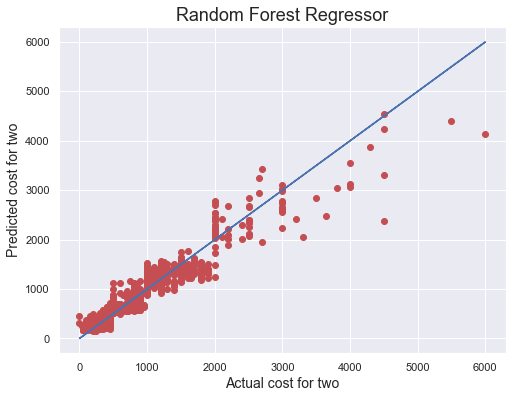

In [185]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual cost for two',fontsize= 14)
plt.ylabel('Predicted cost for two',fontsize= 14)
plt.title('Random Forest Regressor',fontsize= 18)
plt.show()

# Prediction

In [186]:
dfpred=pd.DataFrame({'Expected':y_test,'Predicted':pred_test})
dfpred.sample(40)

,Expected,Predicted
2049,200,272.261989
1704,500,579.904248
2804,450,328.657565
8919,200,251.152931
1082,450,312.703668
1949,200,292.037879
4611,250,341.456492
9217,600,489.801290
3898,100,161.751572
5280,250,326.442484


# Model saving

In [187]:
import pickle
filename = 'average_cost_for_two.pkl'
pickle.dump(rf,open(filename, 'wb'))